Задание

    1. Скачайте текст произведения «Война и мир».
    2. Очистите его, оставив только русские буквы и символы пробела.
    3. Постройте матрицу переходных вероятностей.
    4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».
    5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.
    6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
    7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.



In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
with open('tom_1.txt', 'r', encoding='utf-8') as f:
    text1 = f.read().lower()
    text1 = re.sub('[^а-я ]','', text1)

In [3]:
with open('tom_2.txt', 'r', encoding='utf-8') as f:
    text2 = f.read().lower()
    text2 = re.sub('[^а-я ]','', text2)

In [4]:
with open('tom_3.txt', 'r', encoding='utf-8') as f:
    text3 = f.read().lower()
    text3 = re.sub('[^а-я ]','', text3)

In [5]:
with open('tom_4.txt', 'r', encoding='utf-8') as f:
    text4 = f.read().lower()
    text4 = re.sub('[^а-я ]','', text4)

In [6]:
text = text1 + text2 + text3 + text4

In [7]:
while '  ' in text:
    text = re.sub('  ',' ',text)

In [8]:
with open("4_toma_re.txt", "w") as file:
    file.write(text)

In [9]:
RUSSIAN = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [10]:
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [11]:
for cp, cn in zip(text[:-1], text[1:]):
    if cp != ' ' and cn != ' ':
        probabilities[POS[cp], POS[cn]] += 1

In [12]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [13]:
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

In [14]:
df

,а,б,в,г,д,е,ж,з,и,й,...,ц,ч,ш,щ,ъ,ы,ь,э,ю,я
а,0.000258,0.011479,0.061777,0.015763,0.035796,0.017943,0.021983,0.074440,0.002438,0.011981,...,0.001268,0.014028,0.024108,0.004430,0.000000,0.000000,0.000000,0.000056,0.014286,0.044795
б,0.066232,0.000609,0.005483,0.000685,0.001549,0.144065,0.000482,0.000051,0.049426,0.000000,...,0.000203,0.001396,0.000305,0.013658,0.006880,0.276630,0.002539,0.000025,0.000279,0.029752
в,0.166070,0.000517,0.001246,0.001168,0.009365,0.133426,0.000034,0.014969,0.094393,0.000000,...,0.000382,0.001213,0.035878,0.000124,0.000404,0.076213,0.004941,0.000011,0.000022,0.006199
г,0.058973,0.000000,0.002478,0.000069,0.065413,0.032220,0.000069,0.000093,0.045122,0.000000,...,0.000093,0.001714,0.000440,0.000000,0.000000,0.000069,0.000116,0.000000,0.000208,0.000069
д,0.172450,0.001303,0.038816,0.000311,0.001095,0.178357,0.000563,0.000104,0.099911,0.000015,...,0.005936,0.001303,0.004900,0.000015,0.006839,0.024426,0.015929,0.000030,0.001717,0.016862
е,0.000632,0.021087,0.028261,0.064663,0.048931,0.030525,0.019691,0.022663,0.003577,0.046271,...,0.004112,0.017704,0.012634,0.011370,0.000000,0.000000,0.000000,0.000028,0.005049,0.006682
ж,0.152399,0.006049,0.000000,0.001502,0.083229,0.419775,0.002128,0.000000,0.154526,0.000000,...,0.000000,0.004547,0.000000,0.000000,0.000000,0.000000,0.004589,0.000042,0.003212,0.000000
з,0.391379,0.012867,0.058861,0.029292,0.050163,0.017592,0.011950,0.005447,0.025873,0.000028,...,0.000306,0.001167,0.000750,0.000000,0.001167,0.041659,0.044549,0.000000,0.005030,0.034794
и,0.002184,0.010937,0.064627,0.012843,0.039995,0.069943,0.010114,0.050558,0.021463,0.032151,...,0.030120,0.032151,0.008993,0.003659,0.000000,0.000000,0.000010,0.000077,0.009012,0.047637
й,0.001309,0.006918,0.007666,0.003179,0.082274,0.003179,0.000000,0.000561,0.002992,0.000187,...,0.014211,0.030292,0.053291,0.000187,0.000000,0.000000,0.000000,0.000935,0.000187,0.000187


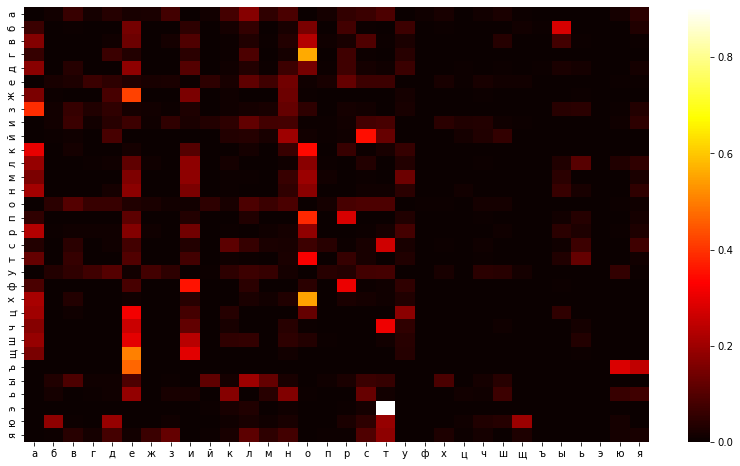

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(df,cmap = 'hot')
plt.show()

In [16]:
# Посчитайте вероятность встретить строку из четырёх символов, 
# которая начинается на букву «П» и заканчивается на букву «Р»

In [17]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
res = 0
for c1 in RUSSIAN:
    for c2 in RUSSIAN:
        proba = prior * probabilities[start, POS[c1]] * probabilities[POS[c1], POS[c2]] * probabilities[POS[c2], end]
        res += proba
        
print(res)

0.0012497586930003129


In [18]:
# Используя матрицу переходных вероятностей, сгенерируйте слово, 
# начинающееся с буквы «Б» длиной восемь символов.

In [58]:
s = []
start = 'б'
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

бобертать


In [20]:
# Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM

In [60]:
!pip install hmmlearn

In [61]:
from hmmlearn.hmm import GaussianHMM

In [64]:
series = pd.read_csv("mean-monthly-air-temperature-deg.csv")["Deg"]

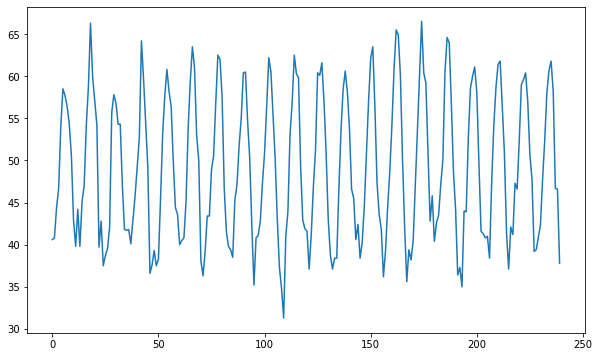

In [70]:
plt.figure(figsize=(10,6))
plt.plot(series);

In [71]:
values = series.values.reshape(-1,1)

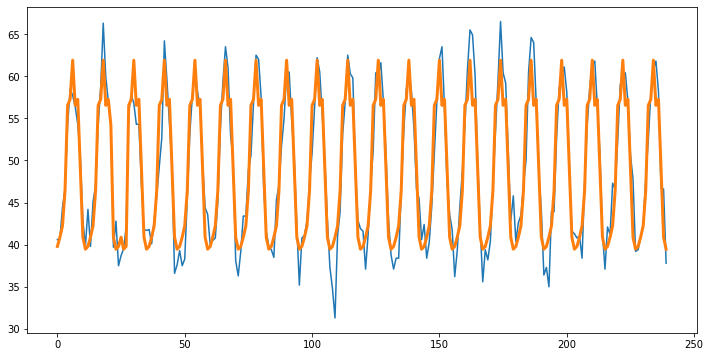

In [88]:
model = GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3);